In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\Asus\AppData\Local\Temp\ipykernel_10668\831608104.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Read CSV File

In [2]:
riskAudit = pd.read_csv('audit_risk.csv')

### Exploratory Data Analysis


In [3]:
# Check the shape of the dataframe
print(riskAudit.shape)

(776, 27)


In [4]:
# Check the first 5 rows of the dataframe
print(riskAudit.head())

   Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  Detection_Risk  Audit

In [5]:
# Check the last 5 rows of the dataframe
print(riskAudit.tail())

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
771         55.57           9    0.49      0.2   0.098    0.40      0.2   
772         55.57          16    0.47      0.2   0.094    0.37      0.2   
773         55.57          14    0.24      0.2   0.048    0.04      0.2   
774         55.57          18    0.20      0.2   0.040    0.00      0.2   
775         55.57          15    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  \
771   0.080   0.89      5.0  ...     0.4        0   0.2     0.0    2.0   
772   0.074   0.84      5.0  ...     0.4        0   0.2     0.0    2.0   
773   0.008   0.28      5.0  ...     0.4        0   0.2     0.0    2.0   
774   0.000   0.20      5.0  ...     0.4        0   0.2     0.0    2.0   
775   0.000   0.00      5.0  ...     0.4        0   0.2     0.0    2.0   

     Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
771          1.578           0.4   

In [6]:
# Remove the LOCATION_ID and Detection_Risk column as it is not useful
riskAudit = riskAudit.drop(['LOCATION_ID','Detection_Risk'], axis=1)

In [7]:
# Check the data types of the columns
print(riskAudit.describe().T)

               count       mean        std   min     25%     50%      75%  \
Sector_score   776.0  20.184536  24.319017  1.85  2.3700  3.8900  55.5700   
PARA_A         776.0   2.450194   5.678870  0.00  0.2100  0.8750   2.4800   
Score_A        776.0   0.351289   0.174055  0.20  0.2000  0.2000   0.6000   
Risk_A         776.0   1.351029   3.440447  0.00  0.0420  0.1750   1.4880   
PARA_B         776.0  10.799988  50.083624  0.00  0.0000  0.4050   4.1600   
Score_B        776.0   0.313144   0.169804  0.20  0.2000  0.2000   0.4000   
Risk_B         776.0   6.334008  30.072845  0.00  0.0000  0.0810   1.8405   
TOTAL          776.0  13.218481  51.312829  0.00  0.5375  1.3700   7.7075   
numbers        776.0   5.067655   0.264449  5.00  5.0000  5.0000   5.0000   
Score_B.1      776.0   0.223711   0.080352  0.20  0.2000  0.2000   0.2000   
Risk_C         776.0   1.152964   0.537417  1.00  1.0000  1.0000   1.0000   
Money_Value    775.0  14.137631  66.606519  0.00  0.0000  0.0900   5.5950   

In [8]:
# Check for information about the dataframe such as the data types of the columns
print(riskAudit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   PARA_A         776 non-null    float64
 2   Score_A        776 non-null    float64
 3   Risk_A         776 non-null    float64
 4   PARA_B         776 non-null    float64
 5   Score_B        776 non-null    float64
 6   Risk_B         776 non-null    float64
 7   TOTAL          776 non-null    float64
 8   numbers        776 non-null    float64
 9   Score_B.1      776 non-null    float64
 10  Risk_C         776 non-null    float64
 11  Money_Value    775 non-null    float64
 12  Score_MV       776 non-null    float64
 13  Risk_D         776 non-null    float64
 14  District_Loss  776 non-null    int64  
 15  PROB           776 non-null    float64
 16  RiSk_E         776 non-null    float64
 17  History        776 non-null    int64  
 18  Prob      

In [9]:
# Check for correlation in the dataframe
print(riskAudit.corr())

               Sector_score    PARA_A   Score_A    Risk_A    PARA_B   Score_B  \
Sector_score       1.000000 -0.216824 -0.425198 -0.219025 -0.132670 -0.218967   
PARA_A            -0.216824  1.000000  0.496680  0.999267  0.161940  0.358550   
Score_A           -0.425198  0.496680  1.000000  0.504878  0.249438  0.572655   
Risk_A            -0.219025  0.999267  0.504878  1.000000  0.165287  0.362971   
PARA_B            -0.132670  0.161940  0.249438  0.165287  1.000000  0.347568   
Score_B           -0.218967  0.358550  0.572655  0.362971  0.347568  1.000000   
Risk_B            -0.130589  0.161834  0.248188  0.165143  0.999936  0.348152   
TOTAL             -0.153316  0.267042  0.297547  0.270223  0.994100  0.379336   
numbers           -0.151840  0.133786  0.242692  0.135613  0.209855  0.277576   
Score_B.1         -0.170404  0.140648  0.274594  0.143103  0.230851  0.313798   
Risk_C            -0.166464  0.140455  0.265983  0.142708  0.223054  0.303009   
Money_Value       -0.117589 

In [10]:
# Check for the columns names in the dataframe
print(riskAudit.columns)

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk'],
      dtype='object')


In [11]:
# Check the number of missing values for each columns
print(riskAudit.isnull().sum())

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      1
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
dtype: int64


In [12]:
# Drop the missing values and check if it is removed
riskAudit = riskAudit.dropna()
print(riskAudit.isnull().sum())

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
dtype: int64


In [13]:
# Check the number of duplicate rows in the dataframe
print(riskAudit.duplicated().sum())

54


In [14]:
# Drop the duplicate rows and check if it is removed
riskAudit = riskAudit.drop_duplicates()
print(riskAudit.duplicated().sum())

0


In [15]:
# Do Variance inflation factor to check for multicollinearity
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

print(calculate_vif(riskAudit))

        variables           VIF
0    Sector_score  2.139558e+00
1          PARA_A  1.105616e+03
2         Score_A           inf
3          Risk_A  1.876643e+03
4          PARA_B  1.760055e+04
5         Score_B           inf
6          Risk_B  6.867352e+04
7           TOTAL  6.974385e+03
8         numbers  2.352500e+02
9       Score_B.1           inf
10         Risk_C  3.687618e+02
11    Money_Value  1.005201e+04
12       Score_MV           inf
13         Risk_D  1.147657e+05
14  District_Loss           inf
15           PROB           inf
16         RiSk_E           inf
17        History  1.505284e+02
18           Prob           inf
19         Risk_F           inf
20          Score           inf
21  Inherent_Risk  2.168750e+05
22   CONTROL_RISK           inf
23     Audit_Risk  1.522269e+01
24           Risk  7.453442e+00


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [16]:
# Check the frequency of '0' and '1' in the Risk Column
print(riskAudit['Risk'].value_counts())

Risk
0    418
1    303
Name: count, dtype: int64


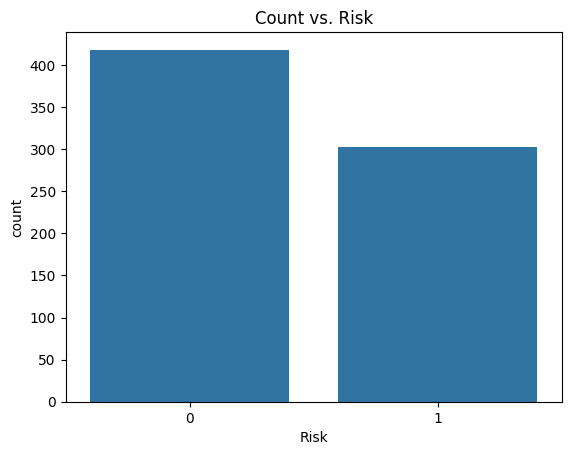

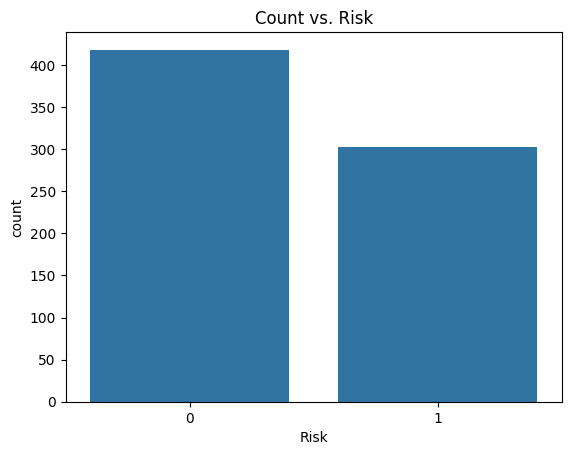

In [17]:
# Visualize the balance of data in the Risk Column by using histogram 
sns.countplot(x='Risk',data = riskAudit)
plt.title('Count vs. Risk')
plt.show()# Visualize the balance of data in the Risk Column by using histogram 
sns.countplot(x='Risk',data = riskAudit)
plt.title('Count vs. Risk')
plt.show()

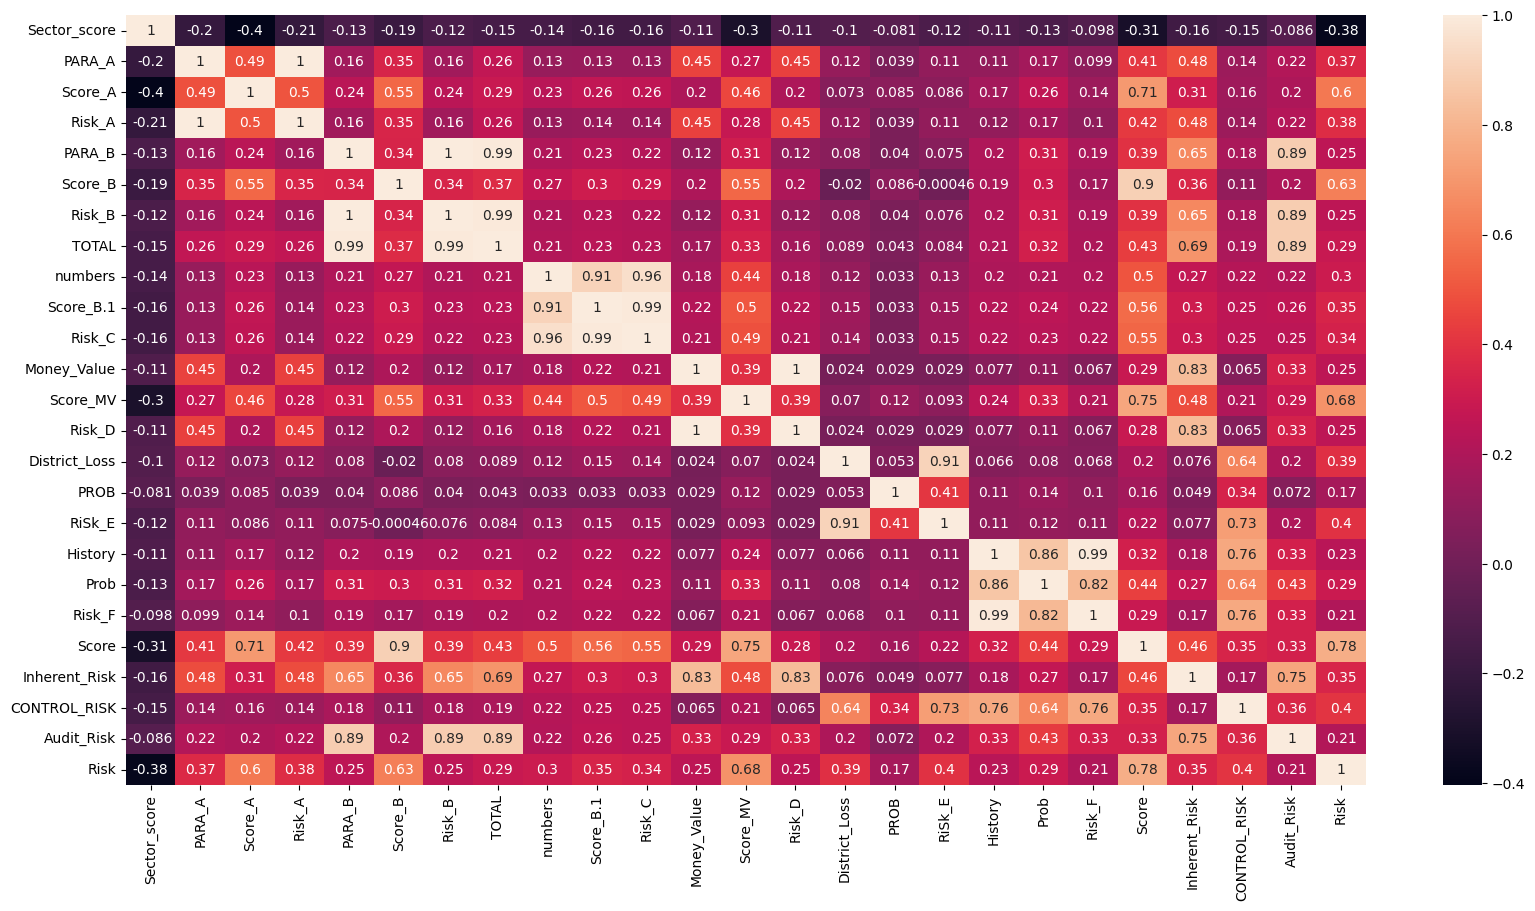

In [18]:
# Check the correlation between all the columns in the dataframe
plt.figure(figsize = (20,10))
sns.heatmap(riskAudit.corr(), annot=True)
plt.show()

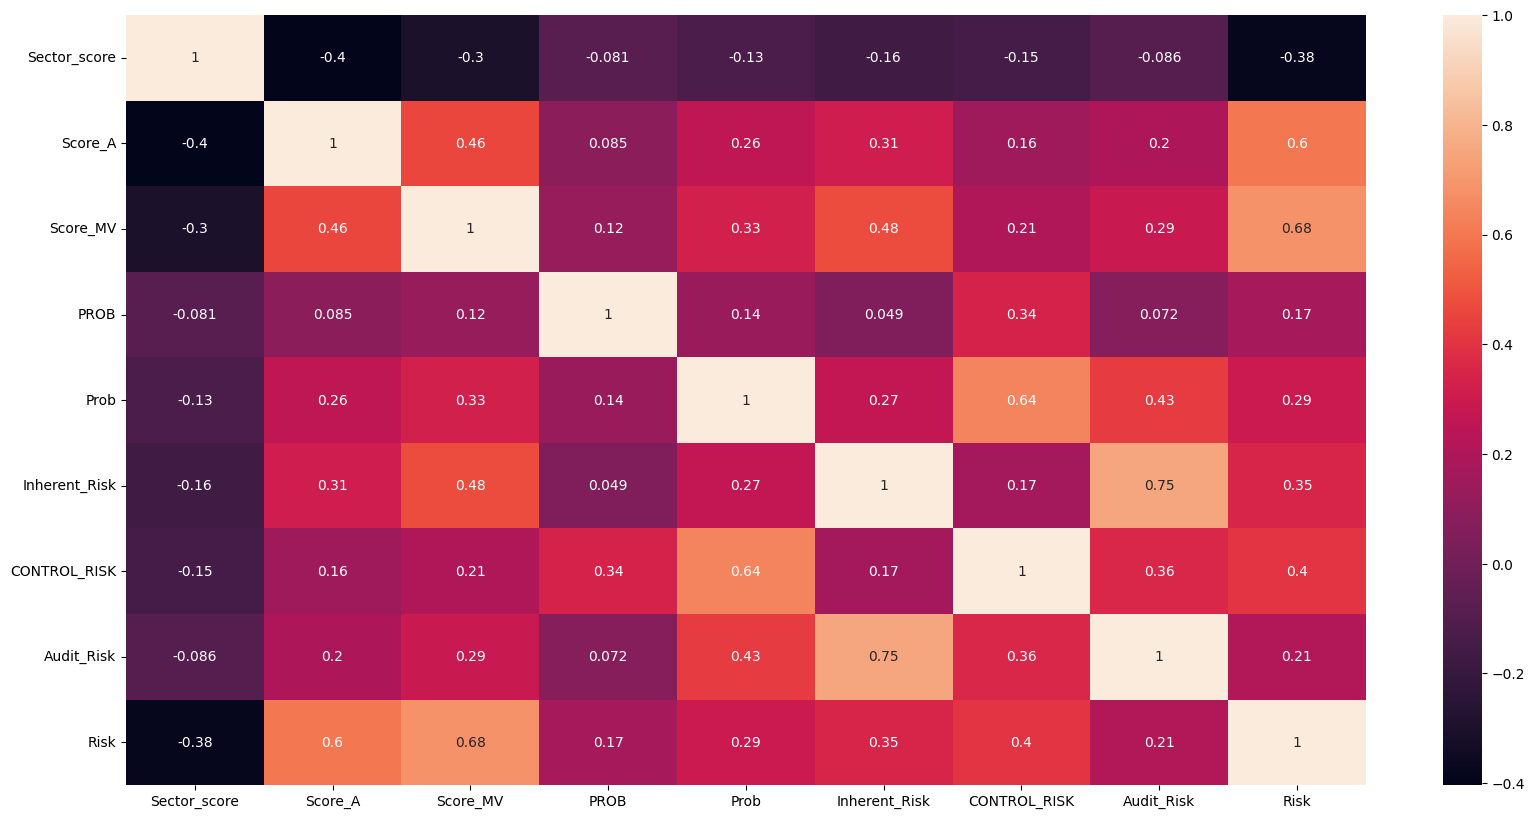

In [19]:
# Drop the features which are highly correlated with each other and check the correlation again with heatmap
riskAudit = riskAudit.drop(['PARA_A','Risk_A','PARA_B','Score_B','Risk_B','TOTAL','numbers','Score_B.1',\
                            'Risk_C','Money_Value','Risk_D','District_Loss','RiSk_E','History','Risk_F','Score'], axis=1)
plt.figure(figsize = (20,10))
sns.heatmap(riskAudit.corr(), annot=True)
plt.show()

In [20]:
# Save excel csv file after EDA and data cleaning
riskAudit.to_csv('audit_risk_clean.csv', index=False)